In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline

In [2]:
shp_path = "~/Desktop/Gianfranco Analisi Dati/Classification Algorithms/Klustering/Italy_shapefile_comuni/ITA_adm3.shp"
italy = gpd.read_file(shp_path)

In [3]:
italy.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,CCN_3,CCA_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
0,112,ITA,Italy,1,Abruzzo,1,Chieti,1,Altino,0,None,Commune,Commune,None,None,"POLYGON ((14.37817 42.13018, 14.39436 42.13540..."
1,112,ITA,Italy,1,Abruzzo,1,Chieti,2,Archi,0,None,Commune,Commune,None,None,"POLYGON ((14.41616 42.10876, 14.42894 42.11114..."
2,112,ITA,Italy,1,Abruzzo,1,Chieti,3,Ari,0,None,Commune,Commune,None,None,"POLYGON ((14.24233 42.26358, 14.24231 42.26422..."
3,112,ITA,Italy,1,Abruzzo,1,Chieti,4,Arielli,0,None,Commune,Commune,None,None,"POLYGON ((14.32802 42.26972, 14.32465 42.26430..."
4,112,ITA,Italy,1,Abruzzo,1,Chieti,5,Atessa,0,None,Commune,Commune,None,None,"MULTIPOLYGON (((14.41616 42.10876, 14.41364 42..."


In [4]:
prov_Trento = italy[italy['NAME_2']=='Trento']
prov_Trento

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,CCN_3,CCA_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
7130,112,ITA,Italy,17,Trentino-Alto Adige,100,Trento,7131,Ala,0,None,Commune,Commune,None,None,"POLYGON ((11.13952 45.69776, 11.13701 45.69660..."
7131,112,ITA,Italy,17,Trentino-Alto Adige,100,Trento,7132,Albiano,0,None,Commune,Commune,None,None,"POLYGON ((11.20962 46.14533, 11.20694 46.14315..."
7132,112,ITA,Italy,17,Trentino-Alto Adige,100,Trento,7133,Aldeno,0,None,Commune,Commune,None,None,"POLYGON ((11.08735 45.97787, 11.08873 45.97934..."
7133,112,ITA,Italy,17,Trentino-Alto Adige,100,Trento,7134,Amblar,0,None,Commune,Commune,None,None,"POLYGON ((11.18995 46.36033, 11.18942 46.36097..."
7134,112,ITA,Italy,17,Trentino-Alto Adige,100,Trento,7135,Andalo,0,None,Commune,Commune,None,None,"MULTIPOLYGON (((11.02194 46.15219, 11.01475 46..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7348,112,ITA,Italy,17,Trentino-Alto Adige,100,Trento,7349,Villa Rendena,0,None,Commune,Commune,None,None,"POLYGON ((10.63766 46.06373, 10.63482 46.06334..."
7349,112,ITA,Italy,17,Trentino-Alto Adige,100,Trento,7350,Volano,0,None,Commune,Commune,None,None,"POLYGON ((11.11631 45.90346, 11.11498 45.90248..."
7350,112,ITA,Italy,17,Trentino-Alto Adige,100,Trento,7351,Zambana,0,None,Commune,Commune,None,None,"MULTIPOLYGON (((11.08496 46.18270, 11.09377 46..."
7351,112,ITA,Italy,17,Trentino-Alto Adige,100,Trento,7352,Ziano Di Fiemme,0,None,Commune,Commune,None,None,"POLYGON ((11.55856 46.32783, 11.56022 46.32756..."


In [5]:
prov_Trento.drop(prov_Trento.columns[:8], axis=1, inplace=True)
prov_Trento.head()

/home/davide/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,NAME_3,CCN_3,CCA_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
7130,Ala,0,None,Commune,Commune,None,None,"POLYGON ((11.13952 45.69776, 11.13701 45.69660..."
7131,Albiano,0,None,Commune,Commune,None,None,"POLYGON ((11.20962 46.14533, 11.20694 46.14315..."
7132,Aldeno,0,None,Commune,Commune,None,None,"POLYGON ((11.08735 45.97787, 11.08873 45.97934..."
7133,Amblar,0,None,Commune,Commune,None,None,"POLYGON ((11.18995 46.36033, 11.18942 46.36097..."
7134,Andalo,0,None,Commune,Commune,None,None,"MULTIPOLYGON (((11.02194 46.15219, 11.01475 46..."


In [6]:
prov_Trento.drop(prov_Trento.columns[1:7], axis=1, inplace=True)
prov_Trento.head()

/home/davide/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,NAME_3,geometry
7130,Ala,"POLYGON ((11.13952 45.69776, 11.13701 45.69660..."
7131,Albiano,"POLYGON ((11.20962 46.14533, 11.20694 46.14315..."
7132,Aldeno,"POLYGON ((11.08735 45.97787, 11.08873 45.97934..."
7133,Amblar,"POLYGON ((11.18995 46.36033, 11.18942 46.36097..."
7134,Andalo,"MULTIPOLYGON (((11.02194 46.15219, 11.01475 46..."


In [7]:
prov_Trento.rename(columns= {'NAME_3':'COMUNE'}, inplace=True)
prov_Trento.head()

/home/davide/.local/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,COMUNE,geometry
7130,Ala,"POLYGON ((11.13952 45.69776, 11.13701 45.69660..."
7131,Albiano,"POLYGON ((11.20962 46.14533, 11.20694 46.14315..."
7132,Aldeno,"POLYGON ((11.08735 45.97787, 11.08873 45.97934..."
7133,Amblar,"POLYGON ((11.18995 46.36033, 11.18942 46.36097..."
7134,Andalo,"MULTIPOLYGON (((11.02194 46.15219, 11.01475 46..."


In [8]:
comuni_prov_Trento = prov_Trento['COMUNE'].to_numpy()
comuni_prov_Trento

array(['Ala', 'Albiano', 'Aldeno', 'Amblar', 'Andalo', 'Arco', 'Avio',
       'Baselga di Pinè', 'Bedollo', 'Bersone', 'Besenello', 'Bezzecca',
       'Bieno', 'Bleggio Inferiore', 'Bleggio Superiore', 'Bocenago',
       'Bolbeno', 'Bondo', 'Bondone', 'Borgo Valsugana', 'Bosentino',
       'Breguzzo', 'Brentonico', 'Bresimo', 'Brez', 'Brione', 'Caderzone',
       'Cagnò', 'Calavino', 'Calceranica Al Lago', 'Caldes', 'Caldonazzo',
       'Calliano', 'Campitello Di Fassa', 'Campodenno', 'Canal San Bovo',
       'Canazei', 'Capriana', 'Carano', 'Carisolo', 'Carzano',
       'Castel Condino', 'Castelfondo', 'Castello-Molina Di Fiemme',
       'Castello Tesino', 'Castelnuovo', 'Cavalese', 'Cavareno',
       'Cavedago', 'Cavedine', 'Cavizzana', 'Cembra', 'Centa San Nicolò',
       'Cimego', 'Cimone', 'Cinte Tesino', 'Cis', 'Civezzano', 'Cles',
       'Cloz', 'Commezzadura', 'Concei', 'Condino', 'Coredo', 'Croviana',
       'Cunevo', 'Daiano', 'Dambel', 'Daone', 'Darè', 'Denno', 'Dimaro',
   

<AxesSubplot:>

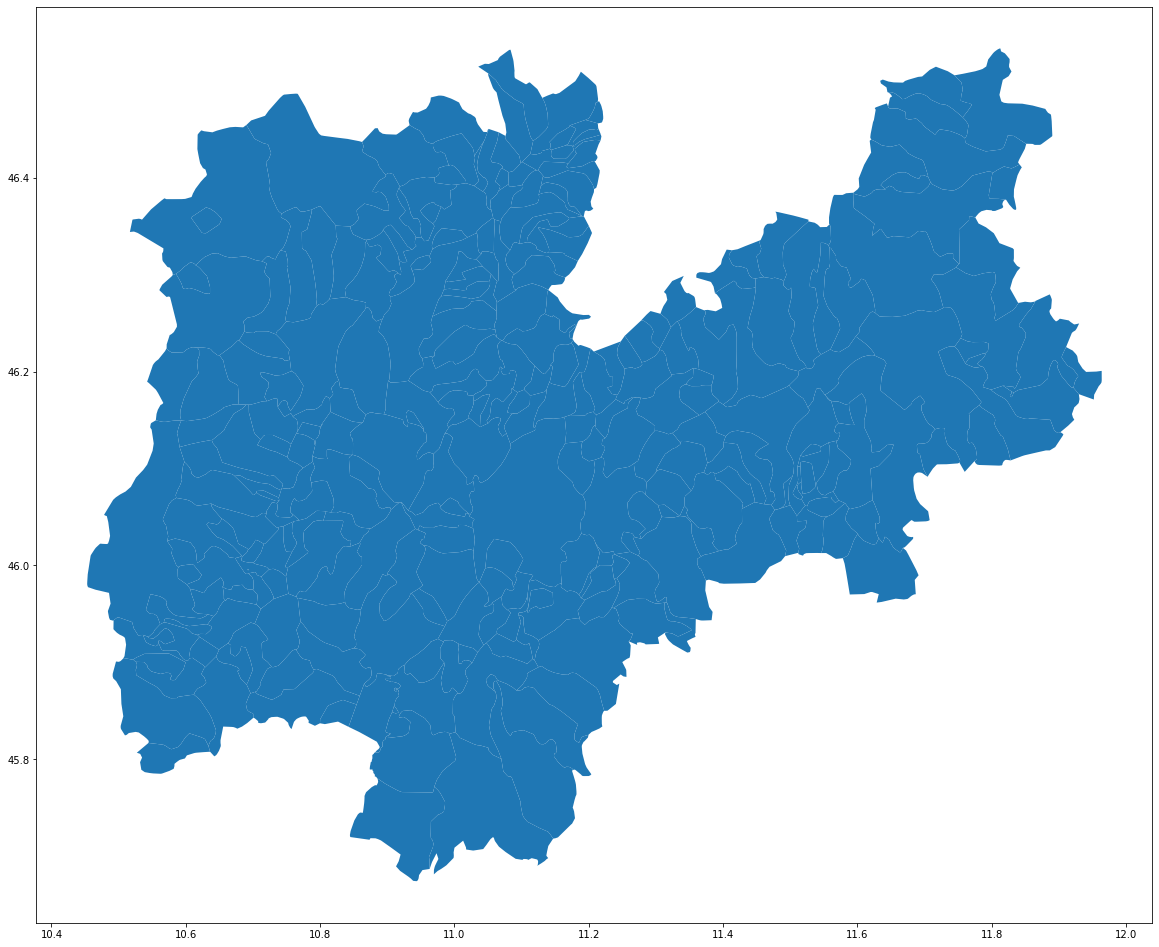

In [9]:
prov_Trento.plot(figsize=(20,20))

In [10]:
prov_Trento.index = np.arange(len(prov_Trento))
prov_Trento.head()

,COMUNE,geometry
0,Ala,"POLYGON ((11.13952 45.69776, 11.13701 45.69660..."
1,Albiano,"POLYGON ((11.20962 46.14533, 11.20694 46.14315..."
2,Aldeno,"POLYGON ((11.08735 45.97787, 11.08873 45.97934..."
3,Amblar,"POLYGON ((11.18995 46.36033, 11.18942 46.36097..."
4,Andalo,"MULTIPOLYGON (((11.02194 46.15219, 11.01475 46..."


In [11]:
fusioni_comuni_italiani = pd.read_html(io='https://it.wikipedia.org/wiki/Fusione_di_comuni_italiani')
fusioni_comuni_italiani

[    0                                                  1
 0 NaN  Questa voce o sezione deve essere rivista e ag...,
    Anno di istituzione (anno di soppressione)                Regione  \
 0                                        1862                  Lazio   
 1                                 1870 (1877)              Lombardia   
 2                                        1870              Lombardia   
 3                                        1870              Lombardia   
 4                                        1873                Toscana   
 5                                 1874 (1877)              Lombardia   
 6                                        1878               Calabria   
 7                                 1920 (1923)              Lombardia   
 8                                 1920 (2018)    Trentino-Alto Adige   
 9                                        1923                Liguria   
 10                                       1927                Abruzzo   
 11    

In [12]:
incorporazioni= fusioni_comuni_italiani[3]
incorporazioni

,Anno,Regione,Provincia,Comune incorporante,Comune soppresso,Note
0,2015,Lombardia,Sondrio,Gordona,Menarola,[52]
1,2016,Lombardia,Brescia,Bienno,Prestine,NaN
2,2016,Trentino-Alto Adige,Trento,Castel Ivano[53],Ivano-Fracena,NaN
3,2017,Lombardia,Mantova,Sermide e Felonica[54],Felonica,NaN
4,2017,Lombardia,Como,San Fermo della Battaglia,Cavallasca,NaN
5,2017,Marche,Macerata,Fiastra,Acquacanina,NaN
6,2017,Piemonte,Biella,Pettinengo,Selve Marcone,NaN
7,2018,Piemonte,Vercelli,Varallo,Sabbia,NaN
8,2019,Lombardia,Cremona,Torre de' Picenardi,Ca' d'Andrea,NaN
9,2019,Lombardia,Mantova,San Giorgio Bigarello[55],Bigarello,NaN


In [13]:
inc_prov_Trento = incorporazioni[incorporazioni['Provincia']=='Trento']
inc_prov_Trento

,Anno,Regione,Provincia,Comune incorporante,Comune soppresso,Note
2,2016,Trentino-Alto Adige,Trento,Castel Ivano[53],Ivano-Fracena,NaN
15,2020,Trentino-Alto Adige,Trento,San Michele all'Adige,Faedo,NaN


In [14]:
inc_prov_Trento.iat[0,3] = 'Castel Ivano'
inc_prov_Trento

,Anno,Regione,Provincia,Comune incorporante,Comune soppresso,Note
2,2016,Trentino-Alto Adige,Trento,Castel Ivano,Ivano-Fracena,NaN
15,2020,Trentino-Alto Adige,Trento,San Michele all'Adige,Faedo,NaN


In [15]:
inc_prov_Trento.drop(columns=['Anno','Regione','Provincia','Note'], inplace=True)
inc_prov_Trento

/home/davide/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Comune incorporante,Comune soppresso
2,Castel Ivano,Ivano-Fracena
15,San Michele all'Adige,Faedo


In [16]:
inc_prov_Trento.rename(columns={'Comune incorporante':'Nuovo comune', 'Comune soppresso': 'Comuni soppressi'}, inplace=True)
inc_prov_Trento

/home/davide/.local/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Nuovo comune,Comuni soppressi
2,Castel Ivano,Ivano-Fracena
15,San Michele all'Adige,Faedo


In [17]:
inc_prov_Trento['Comuni soppressi (separati)'] = inc_prov_Trento.apply(lambda row : row['Comuni soppressi']+', '+row['Nuovo comune'],axis=1)

/tmp/ipykernel_25074/3556922872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc_prov_Trento['Comuni soppressi (separati)'] = inc_prov_Trento.apply(lambda row : row['Comuni soppressi']+', '+row['Nuovo comune'],axis=1)


In [18]:
inc_prov_Trento

,Nuovo comune,Comuni soppressi,Comuni soppressi (separati)
2,Castel Ivano,Ivano-Fracena,"Ivano-Fracena, Castel Ivano"
15,San Michele all'Adige,Faedo,"Faedo, San Michele all'Adige"


In [19]:
fusioni_moderne = fusioni_comuni_italiani[2]
fusioni_moderne

,Anno di istituzione(anno di soppressione),Regione,Provincia,Nuovo comune,Comuni soppressi,Note
0,1968,Calabria,Catanzaro,Lamezia Terme,Nicastro Sambiase Sant'Eufemia Lamezia,[38]
1,1974,Trentino-Alto Adige,Bolzano,Senale-San Felice,San Felice Senale,NaN
2,1995,Veneto,Rovigo,Porto Viro,Contarina Donada,[39]
3,1995,Veneto,Padova,Due Carrare,Carrara San Giorgio Carrara Santo Stefano,[39]
4,1998,Piemonte,Asti,Montiglio Monferrato,Colcavagno Montiglio Scandeluzza,[39]
...,...,...,...,...,...,...
121,2019,Veneto,Vicenza,Lusiana Conco,Conco Lusiana,NaN
122,2019,Veneto,Vicenza,Valbrenta,Campolongo sul Brenta Cismon del Grappa San Na...,NaN
123,2020,Trentino-Alto Adige,Trento,Borgo d'Anaunia,Castelfondo Fondo Malosco,NaN
124,2020,Trentino-Alto Adige,Trento,Novella,Brez Cagnò Cloz Revò Romallo,NaN


In [20]:
f_m_TN = fusioni_moderne[fusioni_moderne['Provincia']=='Trento']
f_m_TN.head()

,Anno di istituzione(anno di soppressione),Regione,Provincia,Nuovo comune,Comuni soppressi,Note
8,2010,Trentino-Alto Adige,Trento,Comano Terme,Bleggio Inferiore Lomaso,NaN
9,2010,Trentino-Alto Adige,Trento,Ledro,Bezzecca Concei Molina di Ledro Pieve di Ledro...,NaN
40,2015,Trentino-Alto Adige,Trento,Predaia,Coredo Smarano Taio Tres Vervò,NaN
41,2015,Trentino-Alto Adige,Trento,San Lorenzo Dorsino,Dorsino San Lorenzo in Banale,NaN
42,2015,Trentino-Alto Adige,Trento,Valdaone,Bersone Daone Praso,NaN


In [21]:
f_m_TN.drop(columns=['Anno di istituzione(anno di soppressione)','Regione','Provincia','Note'],inplace=True)
f_m_TN.head()

/home/davide/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Nuovo comune,Comuni soppressi
8,Comano Terme,Bleggio Inferiore Lomaso
9,Ledro,Bezzecca Concei Molina di Ledro Pieve di Ledro...
40,Predaia,Coredo Smarano Taio Tres Vervò
41,San Lorenzo Dorsino,Dorsino San Lorenzo in Banale
42,Valdaone,Bersone Daone Praso


In [22]:
def separazione_comuni(stringa_comuni,lista_comuni):
    stringa_comuni_separati = ''
    stringa_comuni = stringa_comuni.lower()
    stringa_comuni_split = stringa_comuni.split()
    n_words = len(stringa_comuni_split)
    i = 0
    s = stringa_comuni_split[i]
    print(stringa_comuni_split)
    print(n_words)
    while(i < n_words):
        print(s)
        if s in lista_comuni:
            print('presente')
            stringa_comuni_separati += s.title() + ', '
            i += 1
            if i < n_words:
                s = stringa_comuni_split[i]
        elif i < n_words-1:
            print('non presente')
            i += 1
            s += " " + stringa_comuni_split[i]
        print(stringa_comuni_separati+'\n')
    return stringa_comuni_separati[:-2]

In [23]:
comuni_prov_Trento_in_minuscolo = list(map(lambda s: s.lower(), comuni_prov_Trento))
comuni_prov_Trento_in_minuscolo

['ala',
 'albiano',
 'aldeno',
 'amblar',
 'andalo',
 'arco',
 'avio',
 'baselga di pinè',
 'bedollo',
 'bersone',
 'besenello',
 'bezzecca',
 'bieno',
 'bleggio inferiore',
 'bleggio superiore',
 'bocenago',
 'bolbeno',
 'bondo',
 'bondone',
 'borgo valsugana',
 'bosentino',
 'breguzzo',
 'brentonico',
 'bresimo',
 'brez',
 'brione',
 'caderzone',
 'cagnò',
 'calavino',
 'calceranica al lago',
 'caldes',
 'caldonazzo',
 'calliano',
 'campitello di fassa',
 'campodenno',
 'canal san bovo',
 'canazei',
 'capriana',
 'carano',
 'carisolo',
 'carzano',
 'castel condino',
 'castelfondo',
 'castello-molina di fiemme',
 'castello tesino',
 'castelnuovo',
 'cavalese',
 'cavareno',
 'cavedago',
 'cavedine',
 'cavizzana',
 'cembra',
 'centa san nicolò',
 'cimego',
 'cimone',
 'cinte tesino',
 'cis',
 'civezzano',
 'cles',
 'cloz',
 'commezzadura',
 'concei',
 'condino',
 'coredo',
 'croviana',
 'cunevo',
 'daiano',
 'dambel',
 'daone',
 'darè',
 'denno',
 'dimaro',
 'don',
 'dorsino',
 'drena',

In [24]:
test_string = f_m_TN.iloc[1]['Comuni soppressi']
test_string

'Bezzecca Concei Molina di Ledro Pieve di Ledro Tiarno di Sopra Tiarno di Sotto'

In [25]:
separazione_comuni(test_string, comuni_prov_Trento_in_minuscolo)

['bezzecca', 'concei', 'molina', 'di', 'ledro', 'pieve', 'di', 'ledro', 'tiarno', 'di', 'sopra', 'tiarno', 'di', 'sotto']
14
bezzecca
presente
Bezzecca, 

concei
presente
Bezzecca, Concei, 

molina
non presente
Bezzecca, Concei, 

molina di
non presente
Bezzecca, Concei, 

molina di ledro
presente
Bezzecca, Concei, Molina Di Ledro, 

pieve
non presente
Bezzecca, Concei, Molina Di Ledro, 

pieve di
non presente
Bezzecca, Concei, Molina Di Ledro, 

pieve di ledro
presente
Bezzecca, Concei, Molina Di Ledro, Pieve Di Ledro, 

tiarno
non presente
Bezzecca, Concei, Molina Di Ledro, Pieve Di Ledro, 

tiarno di
non presente
Bezzecca, Concei, Molina Di Ledro, Pieve Di Ledro, 

tiarno di sopra
presente
Bezzecca, Concei, Molina Di Ledro, Pieve Di Ledro, Tiarno Di Sopra, 

tiarno
non presente
Bezzecca, Concei, Molina Di Ledro, Pieve Di Ledro, Tiarno Di Sopra, 

tiarno di
non presente
Bezzecca, Concei, Molina Di Ledro, Pieve Di Ledro, Tiarno Di Sopra, 

tiarno di sotto
presente
Bezzecca, Concei, Mo

'Bezzecca, Concei, Molina Di Ledro, Pieve Di Ledro, Tiarno Di Sopra, Tiarno Di Sotto'

In [26]:
f_m_TN['Comuni soppressi (separati)'] = f_m_TN['Comuni soppressi'].apply(separazione_comuni, args=(comuni_prov_Trento_in_minuscolo,))

['bleggio', 'inferiore', 'lomaso']
3
bleggio
non presente


bleggio inferiore
presente
Bleggio Inferiore, 

lomaso
presente
Bleggio Inferiore, Lomaso, 

['bezzecca', 'concei', 'molina', 'di', 'ledro', 'pieve', 'di', 'ledro', 'tiarno', 'di', 'sopra', 'tiarno', 'di', 'sotto']
14
bezzecca
presente
Bezzecca, 

concei
presente
Bezzecca, Concei, 

molina
non presente
Bezzecca, Concei, 

molina di
non presente
Bezzecca, Concei, 

molina di ledro
presente
Bezzecca, Concei, Molina Di Ledro, 

pieve
non presente
Bezzecca, Concei, Molina Di Ledro, 

pieve di
non presente
Bezzecca, Concei, Molina Di Ledro, 

pieve di ledro
presente
Bezzecca, Concei, Molina Di Ledro, Pieve Di Ledro, 

tiarno
non presente
Bezzecca, Concei, Molina Di Ledro, Pieve Di Ledro, 

tiarno di
non presente
Bezzecca, Concei, Molina Di Ledro, Pieve Di Ledro, 

tiarno di sopra
presente
Bezzecca, Concei, Molina Di Ledro, Pieve Di Ledro, Tiarno Di Sopra, 

tiarno
non presente
Bezzecca, Concei, Molina Di Ledro, Pieve Di Ledro, Tiar

/tmp/ipykernel_25074/3052673457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_m_TN['Comuni soppressi (separati)'] = f_m_TN['Comuni soppressi'].apply(separazione_comuni, args=(comuni_prov_Trento_in_minuscolo,))


In [27]:
f_m_TN

,Nuovo comune,Comuni soppressi,Comuni soppressi (separati)
8,Comano Terme,Bleggio Inferiore Lomaso,"Bleggio Inferiore, Lomaso"
9,Ledro,Bezzecca Concei Molina di Ledro Pieve di Ledro...,"Bezzecca, Concei, Molina Di Ledro, Pieve Di Le..."
40,Predaia,Coredo Smarano Taio Tres Vervò,"Coredo, Smarano, Taio, Tres, Vervò"
41,San Lorenzo Dorsino,Dorsino San Lorenzo in Banale,"Dorsino, San Lorenzo In Banale"
42,Valdaone,Bersone Daone Praso,"Bersone, Daone, Praso"
51,Altavalle,Faver Grauno Grumes Valda,"Faver, Grauno, Grumes, Valda"
52,Altopiano della Vigolana,Bosentino Centa San Nicolò Vattaro Vigolo Vattaro,"Bosentino, Centa San Nicolò, Vattaro, Vigolo V..."
53,Amblar-Don,Amblar Don,"Amblar, Don"
54,Borgo Chiese,Brione Cimego Condino,"Brione, Cimego, Condino"
55,Borgo Lares,Bolbeno Zuclo,"Bolbeno, Zuclo"


In [28]:
fusioni = pd.concat([f_m_TN, inc_prov_Trento])
fusioni

,Nuovo comune,Comuni soppressi,Comuni soppressi (separati)
8,Comano Terme,Bleggio Inferiore Lomaso,"Bleggio Inferiore, Lomaso"
9,Ledro,Bezzecca Concei Molina di Ledro Pieve di Ledro...,"Bezzecca, Concei, Molina Di Ledro, Pieve Di Le..."
40,Predaia,Coredo Smarano Taio Tres Vervò,"Coredo, Smarano, Taio, Tres, Vervò"
41,San Lorenzo Dorsino,Dorsino San Lorenzo in Banale,"Dorsino, San Lorenzo In Banale"
42,Valdaone,Bersone Daone Praso,"Bersone, Daone, Praso"
51,Altavalle,Faver Grauno Grumes Valda,"Faver, Grauno, Grumes, Valda"
52,Altopiano della Vigolana,Bosentino Centa San Nicolò Vattaro Vigolo Vattaro,"Bosentino, Centa San Nicolò, Vattaro, Vigolo V..."
53,Amblar-Don,Amblar Don,"Amblar, Don"
54,Borgo Chiese,Brione Cimego Condino,"Brione, Cimego, Condino"
55,Borgo Lares,Bolbeno Zuclo,"Bolbeno, Zuclo"


In [29]:
fusioni.index = np.arange(len(fusioni))
fusioni

,Nuovo comune,Comuni soppressi,Comuni soppressi (separati)
0,Comano Terme,Bleggio Inferiore Lomaso,"Bleggio Inferiore, Lomaso"
1,Ledro,Bezzecca Concei Molina di Ledro Pieve di Ledro...,"Bezzecca, Concei, Molina Di Ledro, Pieve Di Le..."
2,Predaia,Coredo Smarano Taio Tres Vervò,"Coredo, Smarano, Taio, Tres, Vervò"
3,San Lorenzo Dorsino,Dorsino San Lorenzo in Banale,"Dorsino, San Lorenzo In Banale"
4,Valdaone,Bersone Daone Praso,"Bersone, Daone, Praso"
5,Altavalle,Faver Grauno Grumes Valda,"Faver, Grauno, Grumes, Valda"
6,Altopiano della Vigolana,Bosentino Centa San Nicolò Vattaro Vigolo Vattaro,"Bosentino, Centa San Nicolò, Vattaro, Vigolo V..."
7,Amblar-Don,Amblar Don,"Amblar, Don"
8,Borgo Chiese,Brione Cimego Condino,"Brione, Cimego, Condino"
9,Borgo Lares,Bolbeno Zuclo,"Bolbeno, Zuclo"


In [30]:
fusioni.drop(columns={'Comuni soppressi'}, inplace=True)
fusioni

,Nuovo comune,Comuni soppressi (separati)
0,Comano Terme,"Bleggio Inferiore, Lomaso"
1,Ledro,"Bezzecca, Concei, Molina Di Ledro, Pieve Di Le..."
2,Predaia,"Coredo, Smarano, Taio, Tres, Vervò"
3,San Lorenzo Dorsino,"Dorsino, San Lorenzo In Banale"
4,Valdaone,"Bersone, Daone, Praso"
5,Altavalle,"Faver, Grauno, Grumes, Valda"
6,Altopiano della Vigolana,"Bosentino, Centa San Nicolò, Vattaro, Vigolo V..."
7,Amblar-Don,"Amblar, Don"
8,Borgo Chiese,"Brione, Cimego, Condino"
9,Borgo Lares,"Bolbeno, Zuclo"


In [31]:
fusioni.head()

,Nuovo comune,Comuni soppressi (separati)
0,Comano Terme,"Bleggio Inferiore, Lomaso"
1,Ledro,"Bezzecca, Concei, Molina Di Ledro, Pieve Di Le..."
2,Predaia,"Coredo, Smarano, Taio, Tres, Vervò"
3,San Lorenzo Dorsino,"Dorsino, San Lorenzo In Banale"
4,Valdaone,"Bersone, Daone, Praso"


In [32]:
def merge_geoms(vecchi_comuni,df_geo):
    vecchi_comuni_list = vecchi_comuni.split(', ')
    geometry_series = gpd.GeoSeries()
    for i in range(len(vecchi_comuni_list)):
        geometry_series = geometry_series.append(df_geo[df_geo['COMUNE']==vecchi_comuni_list[i]]['geometry'])
    return geometry_series.unary_union

In [33]:
def merged_geoms(vecchi_comuni,df_geo):
    vecchi_comuni_list = vecchi_comuni.split(', ')
    geometry_series = gpd.GeoSeries()
    for i in range(len(vecchi_comuni_list)):
        geometry_series = geometry_series.append(df_geo[df_geo['COMUNE']==vecchi_comuni_list[i]]['geometry'])
    return geometry_series

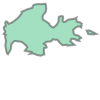

In [34]:
m = merge_geoms('Trento, Pergine Valsugana',prov_Trento)
m

In [35]:
fusioni['geometry'] = fusioni['Comuni soppressi (separati)'].apply(merge_geoms,args=(prov_Trento,))

In [36]:
fusioni.iat[22,0] = 'San Giovanni di Fassa'

In [37]:
fusioni_add = fusioni.drop(columns=['Comuni soppressi (separati)'])
fusioni_add

/home/davide/.local/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/home/davide/.local/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/home/davide/.local/lib/python3.8/site-packages/pandas/io/formats/printing.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/home/davide/.local/lib/python3.8/site-p

,Nuovo comune,geometry
0,Comano Terme,(POLYGON ((10.83675479888916 45.96866226196289...
1,Ledro,"POLYGON ((10.63628959655767 45.81808853149425,..."
2,Predaia,"POLYGON ((11.1299200057984 46.28783035278326, ..."
3,San Lorenzo Dorsino,"POLYGON ((10.90551280975347 46.05749130249018,..."
4,Valdaone,"POLYGON ((10.63228893280024 45.9390220642091, ..."
5,Altavalle,"POLYGON ((11.24738597869884 46.18174743652355,..."
6,Altopiano della Vigolana,"POLYGON ((11.18565082550043 45.94718933105469,..."
7,Amblar-Don,"POLYGON ((11.18898010253901 46.36073684692394,..."
8,Borgo Chiese,"POLYGON ((10.50721931457525 45.90434265136724,..."
9,Borgo Lares,"POLYGON ((10.73077964782709 45.9652557373048, ..."


In [38]:
def get_comuni_soppressi(df_fusioni):
    soppressi= []
    for sop in df_fusioni['Comuni soppressi (separati)']:
        soppressi.extend(sop.split(', '))
    return soppressi


In [39]:
comuni_soppressi = get_comuni_soppressi(fusioni)
comuni_soppressi

['Bleggio Inferiore',
 'Lomaso',
 'Bezzecca',
 'Concei',
 'Molina Di Ledro',
 'Pieve Di Ledro',
 'Tiarno Di Sopra',
 'Tiarno Di Sotto',
 'Coredo',
 'Smarano',
 'Taio',
 'Tres',
 'Vervò',
 'Dorsino',
 'San Lorenzo In Banale',
 'Bersone',
 'Daone',
 'Praso',
 'Faver',
 'Grauno',
 'Grumes',
 'Valda',
 'Bosentino',
 'Centa San Nicolò',
 'Vattaro',
 'Vigolo Vattaro',
 'Amblar',
 'Don',
 'Brione',
 'Cimego',
 'Condino',
 'Bolbeno',
 'Zuclo',
 'Spera',
 'Strigno',
 'Villa Agnedo',
 'Cembra',
 'Lisignago',
 'Cunevo',
 'Flavon',
 'Terres',
 'Dimaro',
 'Monclassico',
 'Calavino',
 'Lasino',
 'Pieve Di Bono',
 'Prezzo',
 'Darè',
 'Vigo Rendena',
 'Villa Rendena',
 'Fiera Di Primiero',
 'Siror',
 'Tonadico',
 'Transacqua',
 'Bondo',
 'Breguzzo',
 'Lardaro',
 'Roncone',
 'Montagne',
 'Preore',
 'Ragoli',
 'Padergnone',
 'Terlago',
 'Vezzano',
 'Nanno',
 'Tassullo',
 'Tuenno',
 'Pozza Di Fassa',
 'Vigo Di Fassa',
 'Nave San Rocco',
 'Zambana',
 'Castelfondo',
 'Fondo',
 'Malosco',
 'Brez',
 'Cagnò',

In [40]:
comuni_non_soppressi = list(prov_Trento['COMUNE'])
len(comuni_non_soppressi)
comuni_non_soppressi = [c for c in comuni_non_soppressi if c not in comuni_soppressi]
len(comuni_non_soppressi)

139

In [41]:
prov_Trento_non_soppressi = prov_Trento[prov_Trento['COMUNE'].isin(comuni_non_soppressi)]
prov_Trento_non_soppressi 

,COMUNE,geometry
0,Ala,"POLYGON ((11.13952 45.69776, 11.13701 45.69660..."
1,Albiano,"POLYGON ((11.20962 46.14533, 11.20694 46.14315..."
2,Aldeno,"POLYGON ((11.08735 45.97787, 11.08873 45.97934..."
4,Andalo,"MULTIPOLYGON (((11.02194 46.15219, 11.01475 46..."
5,Arco,"POLYGON ((10.92601 45.89730, 10.92206 45.89591..."
...,...,...
209,Vermiglio,"POLYGON ((10.61709 46.22475, 10.61035 46.22519..."
212,Vignola-Falesina,"POLYGON ((11.30857 46.05011, 11.30038 46.03823..."
217,Villa Lagarina,"POLYGON ((11.05616 45.96144, 11.05687 45.96089..."
219,Volano,"POLYGON ((11.11631 45.90346, 11.11498 45.90248..."


In [42]:
fusioni_add.rename(columns={'Nuovo comune':'COMUNE'},inplace=True)
fusioni_add

/home/davide/.local/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/home/davide/.local/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/home/davide/.local/lib/python3.8/site-packages/pandas/io/formats/printing.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/home/davide/.local/lib/python3.8/site-p

,COMUNE,geometry
0,Comano Terme,(POLYGON ((10.83675479888916 45.96866226196289...
1,Ledro,"POLYGON ((10.63628959655767 45.81808853149425,..."
2,Predaia,"POLYGON ((11.1299200057984 46.28783035278326, ..."
3,San Lorenzo Dorsino,"POLYGON ((10.90551280975347 46.05749130249018,..."
4,Valdaone,"POLYGON ((10.63228893280024 45.9390220642091, ..."
5,Altavalle,"POLYGON ((11.24738597869884 46.18174743652355,..."
6,Altopiano della Vigolana,"POLYGON ((11.18565082550043 45.94718933105469,..."
7,Amblar-Don,"POLYGON ((11.18898010253901 46.36073684692394,..."
8,Borgo Chiese,"POLYGON ((10.50721931457525 45.90434265136724,..."
9,Borgo Lares,"POLYGON ((10.73077964782709 45.9652557373048, ..."


In [43]:
prov_Trento_2022 = gpd.GeoDataFrame( pd.concat([prov_Trento_non_soppressi,fusioni_add]) )
prov_Trento_2022

,COMUNE,geometry
0,Ala,"POLYGON ((11.13952 45.69776, 11.13701 45.69660..."
1,Albiano,"POLYGON ((11.20962 46.14533, 11.20694 46.14315..."
2,Aldeno,"POLYGON ((11.08735 45.97787, 11.08873 45.97934..."
4,Andalo,"MULTIPOLYGON (((11.02194 46.15219, 11.01475 46..."
5,Arco,"POLYGON ((10.92601 45.89730, 10.92206 45.89591..."
...,...,...
24,Borgo d'Anaunia,"MULTIPOLYGON (((11.18096 46.45095, 11.18100 46..."
25,Novella,"POLYGON ((11.04862 46.44739, 11.05003 46.45033..."
26,Ville di Fiemme,"POLYGON ((11.44858 46.28736, 11.44547 46.28642..."
27,Castel Ivano,"POLYGON ((11.58176 46.06404, 11.58132 46.06382..."


In [44]:
prov_Trento_2022 = prov_Trento_2022.sort_values(by='COMUNE')
prov_Trento_2022

,COMUNE,geometry
0,Ala,"POLYGON ((11.13952 45.69776, 11.13701 45.69660..."
1,Albiano,"POLYGON ((11.20962 46.14533, 11.20694 46.14315..."
2,Aldeno,"POLYGON ((11.08735 45.97787, 11.08873 45.97934..."
5,Altavalle,"POLYGON ((11.24739 46.18175, 11.24723 46.18140..."
6,Altopiano della Vigolana,"POLYGON ((11.18565 45.94719, 11.18534 45.94799..."
...,...,...
217,Villa Lagarina,"POLYGON ((11.05616 45.96144, 11.05687 45.96089..."
21,Ville d'Anaunia,"POLYGON ((10.97662 46.27465, 10.97426 46.27062..."
26,Ville di Fiemme,"POLYGON ((11.44858 46.28736, 11.44547 46.28642..."
219,Volano,"POLYGON ((11.11631 45.90346, 11.11498 45.90248..."


In [45]:
prov_Trento_2022.index = np.arange(len(prov_Trento_2022))
prov_Trento_2022

,COMUNE,geometry
0,Ala,"POLYGON ((11.13952 45.69776, 11.13701 45.69660..."
1,Albiano,"POLYGON ((11.20962 46.14533, 11.20694 46.14315..."
2,Aldeno,"POLYGON ((11.08735 45.97787, 11.08873 45.97934..."
3,Altavalle,"POLYGON ((11.24739 46.18175, 11.24723 46.18140..."
4,Altopiano della Vigolana,"POLYGON ((11.18565 45.94719, 11.18534 45.94799..."
...,...,...
163,Villa Lagarina,"POLYGON ((11.05616 45.96144, 11.05687 45.96089..."
164,Ville d'Anaunia,"POLYGON ((10.97662 46.27465, 10.97426 46.27062..."
165,Ville di Fiemme,"POLYGON ((11.44858 46.28736, 11.44547 46.28642..."
166,Volano,"POLYGON ((11.11631 45.90346, 11.11498 45.90248..."


<AxesSubplot:>

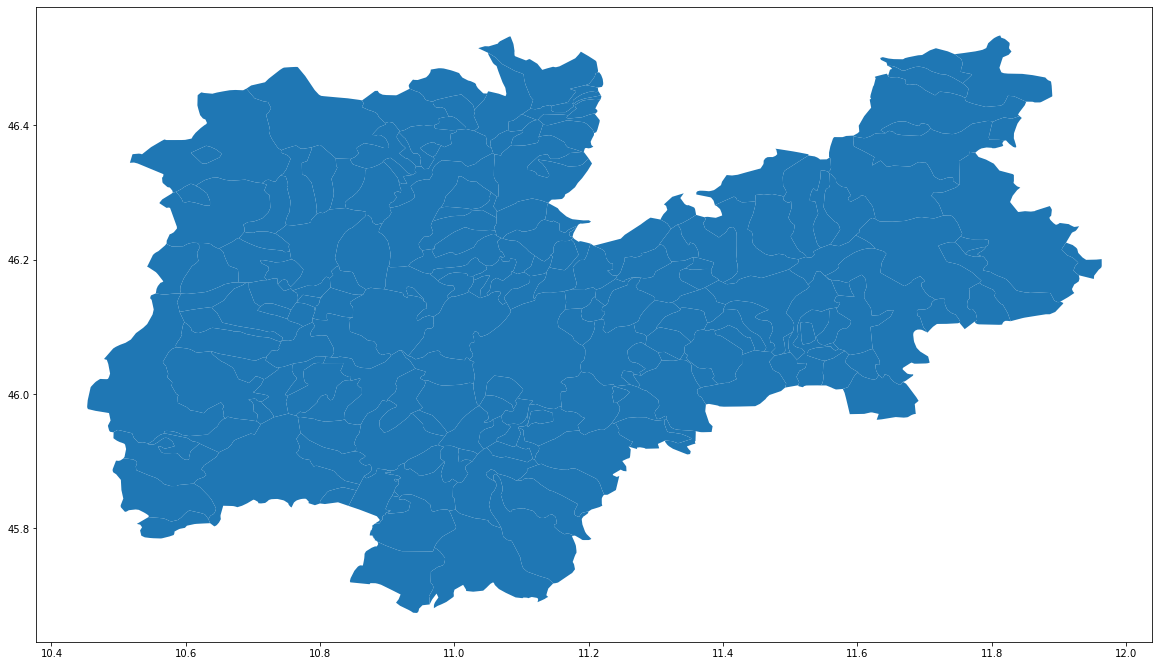

In [46]:
prov_Trento_2022.plot(figsize=(20,20))

<AxesSubplot:>

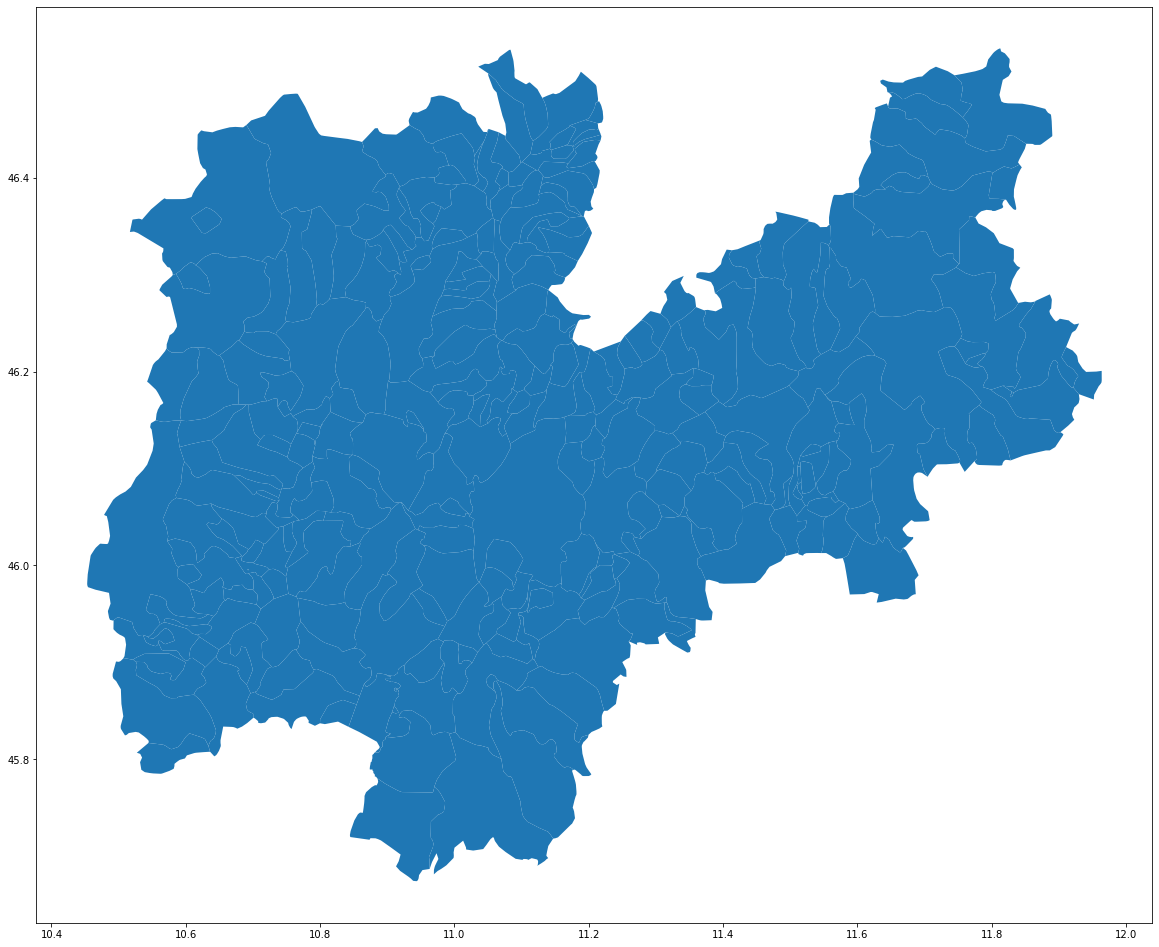

In [47]:
prov_Trento.plot(figsize=(20,20))

In [48]:
print(list(prov_Trento_2022['COMUNE']))

['Ala', 'Albiano', 'Aldeno', 'Altavalle', 'Altopiano della Vigolana', 'Amblar-Don', 'Andalo', 'Arco', 'Avio', 'Baselga di Pinè', 'Bedollo', 'Besenello', 'Bieno', 'Bleggio Superiore', 'Bocenago', 'Bondone', 'Borgo Chiese', 'Borgo Lares', 'Borgo Valsugana', "Borgo d'Anaunia", 'Brentonico', 'Bresimo', 'Caderzone', 'Calceranica Al Lago', 'Caldes', 'Caldonazzo', 'Calliano', 'Campitello Di Fassa', 'Campodenno', 'Canal San Bovo', 'Canazei', 'Capriana', 'Carisolo', 'Carzano', 'Castel Condino', 'Castel Ivano', 'Castel Ivano', 'Castello Tesino', 'Castello-Molina Di Fiemme', 'Castelnuovo', 'Cavalese', 'Cavareno', 'Cavedago', 'Cavedine', 'Cavizzana', 'Cembra Lisignago', 'Cimone', 'Cinte Tesino', 'Cis', 'Civezzano', 'Cles', 'Comano Terme', 'Commezzadura', 'Contà', 'Croviana', 'Dambel', 'Denno', 'Dimaro Folgarida', 'Drena', 'Dro', 'Fai Della Paganella', 'Fiavè', 'Fierozzo', 'Folgaria', 'Fornace', 'Frassilongo', 'Garniga Terme', 'Giovo', 'Giustino', 'Grigno', 'Imer', 'Isera', 'Lavarone', 'Lavis', 'Le

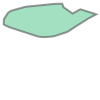

In [49]:
prov_Trento_2022[prov_Trento_2022['COMUNE']=='Castel Ivano']['geometry'][35]

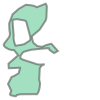

In [50]:
prov_Trento_2022[prov_Trento_2022['COMUNE']=='Castel Ivano']['geometry'][36]

In [51]:
prov_Trento_2022[prov_Trento_2022['geometry']==prov_Trento_2022[prov_Trento_2022['COMUNE']=='Castel Ivano']['geometry'][36]]

,COMUNE,geometry
36,Castel Ivano,"POLYGON ((11.52494 46.06061, 11.52485 46.05793..."


In [52]:
prov_Trento_2022[prov_Trento_2022['geometry']==prov_Trento_2022[prov_Trento_2022['COMUNE']=='Castel Ivano']['geometry'][35]]

,COMUNE,geometry
35,Castel Ivano,"POLYGON ((11.58176 46.06404, 11.58132 46.06382..."


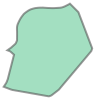

In [53]:
prov_Trento_2022[prov_Trento_2022['COMUNE']=="San Michele all'Adige"]['geometry'][127]

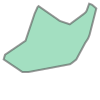

In [54]:
prov_Trento_2022[prov_Trento_2022['COMUNE']=="San Michele all' Adige"]['geometry'][126]

In [55]:
prova1 = prov_Trento_2022.drop([126,127])

<AxesSubplot:>

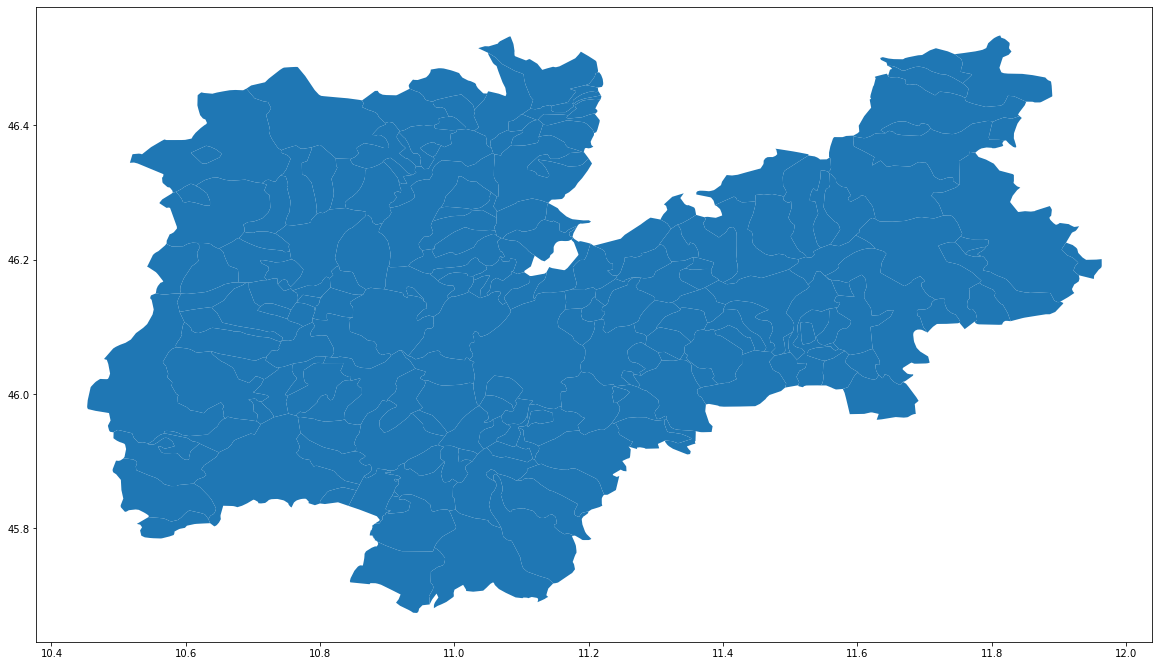

In [56]:
prova1.plot(figsize=(20,20))

In [57]:
ivano = gpd.GeoSeries()
ivano = ivano.append(prov_Trento_2022[prov_Trento_2022['COMUNE']=='Castel Ivano']['geometry'])
michele = gpd.GeoSeries()
michele = michele.append(prov_Trento_2022[prov_Trento_2022['COMUNE']=="San Michele all'Adige"]['geometry'])
michele = michele.append(prov_Trento_2022[prov_Trento_2022['COMUNE']=="San Michele all' Adige"]['geometry'])

In [58]:
ivano

35    POLYGON ((11.58176 46.06404, 11.58132 46.06382...
36    POLYGON ((11.52494 46.06061, 11.52485 46.05793...
dtype: geometry

In [59]:
michele

127    POLYGON ((11.14114 46.18893, 11.14211 46.19037...
126    POLYGON ((11.11978 46.20575, 11.12924 46.19916...
dtype: geometry

In [60]:
p2 = prov_Trento_2022

In [61]:
len(p2.index)

168

In [62]:
p2.loc[len(p2)] = ['Castel Ivano',ivano.unary_union]
p2.loc[len(p2)] = ["San Michele all'Adige",michele.unary_union]
p2

,COMUNE,geometry
0,Ala,"POLYGON ((11.13952 45.69776, 11.13701 45.69660..."
1,Albiano,"POLYGON ((11.20962 46.14533, 11.20694 46.14315..."
2,Aldeno,"POLYGON ((11.08735 45.97787, 11.08873 45.97934..."
3,Altavalle,"POLYGON ((11.24739 46.18175, 11.24723 46.18140..."
4,Altopiano della Vigolana,"POLYGON ((11.18565 45.94719, 11.18534 45.94799..."
...,...,...
165,Ville di Fiemme,"POLYGON ((11.44858 46.28736, 11.44547 46.28642..."
166,Volano,"POLYGON ((11.11631 45.90346, 11.11498 45.90248..."
167,Ziano Di Fiemme,"POLYGON ((11.55856 46.32783, 11.56022 46.32756..."
168,Castel Ivano,"POLYGON ((11.58132 46.06382, 11.57695 46.06152..."


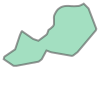

In [63]:
p2[p2['COMUNE']=="San Michele all'Adige"]['geometry'][169]

In [64]:
p3 = p2.drop([126,127])

<AxesSubplot:>

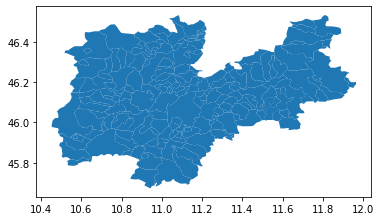

In [65]:
p3.plot()

In [66]:
p2.drop([35,36,126,127],inplace=True)
p2

,COMUNE,geometry
0,Ala,"POLYGON ((11.13952 45.69776, 11.13701 45.69660..."
1,Albiano,"POLYGON ((11.20962 46.14533, 11.20694 46.14315..."
2,Aldeno,"POLYGON ((11.08735 45.97787, 11.08873 45.97934..."
3,Altavalle,"POLYGON ((11.24739 46.18175, 11.24723 46.18140..."
4,Altopiano della Vigolana,"POLYGON ((11.18565 45.94719, 11.18534 45.94799..."
...,...,...
165,Ville di Fiemme,"POLYGON ((11.44858 46.28736, 11.44547 46.28642..."
166,Volano,"POLYGON ((11.11631 45.90346, 11.11498 45.90248..."
167,Ziano Di Fiemme,"POLYGON ((11.55856 46.32783, 11.56022 46.32756..."
168,Castel Ivano,"POLYGON ((11.58132 46.06382, 11.57695 46.06152..."


In [84]:
p2['COMUNE'] = p2['COMUNE'].apply(str.title)

In [85]:
p2.sort_values(by='COMUNE',inplace=True)

In [86]:
p2.index = np.arange(len(p2))
p2

,COMUNE,geometry
0,Ala,"POLYGON ((11.13952 45.69776, 11.13701 45.69660..."
1,Albiano,"POLYGON ((11.20962 46.14533, 11.20694 46.14315..."
2,Aldeno,"POLYGON ((11.08735 45.97787, 11.08873 45.97934..."
3,Altavalle,"POLYGON ((11.24739 46.18175, 11.24723 46.18140..."
4,Altopiano Della Vigolana,"POLYGON ((11.18565 45.94719, 11.18534 45.94799..."
...,...,...
161,Villa Lagarina,"POLYGON ((11.05616 45.96144, 11.05687 45.96089..."
162,Ville D'Anaunia,"POLYGON ((10.97662 46.27465, 10.97426 46.27062..."
163,Ville Di Fiemme,"POLYGON ((11.44858 46.28736, 11.44547 46.28642..."
164,Volano,"POLYGON ((11.11631 45.90346, 11.11498 45.90248..."


In [90]:
list(p2['COMUNE'])

['Ala',
 'Albiano',
 'Aldeno',
 'Altavalle',
 'Altopiano Della Vigolana',
 'Amblar-Don',
 'Andalo',
 'Arco',
 'Avio',
 'Baselga Di Pinè',
 'Bedollo',
 'Besenello',
 'Bieno',
 'Bleggio Superiore',
 'Bocenago',
 'Bondone',
 'Borgo Chiese',
 "Borgo D'Anaunia",
 'Borgo Lares',
 'Borgo Valsugana',
 'Brentonico',
 'Bresimo',
 'Caderzone',
 'Calceranica Al Lago',
 'Caldes',
 'Caldonazzo',
 'Calliano',
 'Campitello Di Fassa',
 'Campodenno',
 'Canal San Bovo',
 'Canazei',
 'Capriana',
 'Carisolo',
 'Carzano',
 'Castel Condino',
 'Castel Ivano',
 'Castello Tesino',
 'Castello-Molina Di Fiemme',
 'Castelnuovo',
 'Cavalese',
 'Cavareno',
 'Cavedago',
 'Cavedine',
 'Cavizzana',
 'Cembra Lisignago',
 'Cimone',
 'Cinte Tesino',
 'Cis',
 'Civezzano',
 'Cles',
 'Comano Terme',
 'Commezzadura',
 'Contà',
 'Croviana',
 'Dambel',
 'Denno',
 'Dimaro Folgarida',
 'Drena',
 'Dro',
 'Fai Della Paganella',
 'Fiavè',
 'Fierozzo',
 'Folgaria',
 'Fornace',
 'Frassilongo',
 'Garniga Terme',
 'Giovo',
 'Giustino',


In [107]:
p2.iat[22,0] = "Caderzone Terme"
p2.iat[113,0] = "Roncegno Terme"
p2.iat[133,0] = "Soraga Di Fassa"
p2.iat[119,0] = 'Ruffrè Mendola'

In [108]:
p2.to_file(driver = 'ESRI Shapefile', filename = 'Provincia_Trento_2022')

In [88]:
shp_path = "~/Desktop/Gianfranco Analisi Dati/Classification Algorithms/Klustering/Provincia_Trento_2022/Provincia_Trento_2022.shp"
provincia_Trento = gpd.read_file(shp_path)

In [89]:
prov_Trento_2022.explore()